# Repeat Callers Analysis (using sanitized data)

## Introduction

![image of call center](https://github.com/ckenlam/Repeat-Callers-Analysis/blob/master/call_center.jpg?raw=true)

Part of keeping customers happy is anticipating their needs, and call center analytics can do that and more. For instance, one of the most important aspects of any customer service operation is the ability to handle a customer’s needs during their first call; if a customer calls back within two weeks, there could be a possibility that the previous issue has not been resolved and that he/she is calling for the same reason.

This study aims to determine whether there exists any dependency between a previous intent and the next intent of a caller.

## Reading & Cleaning the Data

I initially conducted this study for a client of the company I work for. The dataset used in this study has been sanitized to avoid disclosing any sensitive information. Below is a description of what each column means:
- start_dt: start date of the call
- starttime: start date and time of the call
- intent: the reason for calling (e.g. claims, billing, etc.); this column was sanitized 
- next_intent: the reason for calling back within 2 weeks; this column was sanitized
- same_intent: yes/no whether intent matches next_intent

In [21]:
import numpy as np
import pandas as pd

In [22]:
#Load from the saved repeat_caller.csv
repeat_caller = pd.read_csv('repea_caller_encoded.csv')

In [36]:
repeat_caller.head(10)

,start_dt,starttime,intent,next_intent,same_intent
0,3/22/2018,2018-03-22 14:30:09,Caller Intent no.77,Caller Intent no.320,no
1,3/22/2018,2018-03-22 13:12:47,Caller Intent no.19,Caller Intent no.239,no
2,3/22/2018,2018-03-22 18:30:29,Caller Intent no.168,Caller Intent no.330,no
3,3/22/2018,2018-03-22 19:55:54,Caller Intent no.324,Caller Intent no.301,no
4,3/22/2018,2018-03-22 15:03:44,Caller Intent no.134,Caller Intent no.111,no
5,3/22/2018,2018-03-22 13:25:38,Caller Intent no.17,Caller Intent no.244,no
6,3/22/2018,2018-03-22 08:45:34,Caller Intent no.39,Caller Intent no.301,no
7,3/22/2018,2018-03-22 16:25:45,Caller Intent no.297,Caller Intent no.301,yes
8,3/22/2018,2018-03-22 09:19:52,Caller Intent no.40,Caller Intent no.55,no
9,3/22/2018,2018-03-22 19:08:52,Caller Intent no.311,Caller Intent no.238,no


## Exploratory Analysis

In [37]:
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline

In [38]:
repeat_caller.head(5)

,start_dt,starttime,intent,next_intent,same_intent
0,3/22/2018,2018-03-22 14:30:09,Caller Intent no.77,Caller Intent no.320,no
1,3/22/2018,2018-03-22 13:12:47,Caller Intent no.19,Caller Intent no.239,no
2,3/22/2018,2018-03-22 18:30:29,Caller Intent no.168,Caller Intent no.330,no
3,3/22/2018,2018-03-22 19:55:54,Caller Intent no.324,Caller Intent no.301,no
4,3/22/2018,2018-03-22 15:03:44,Caller Intent no.134,Caller Intent no.111,no


### Top 30 Intents by Total Volume

C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'Count')

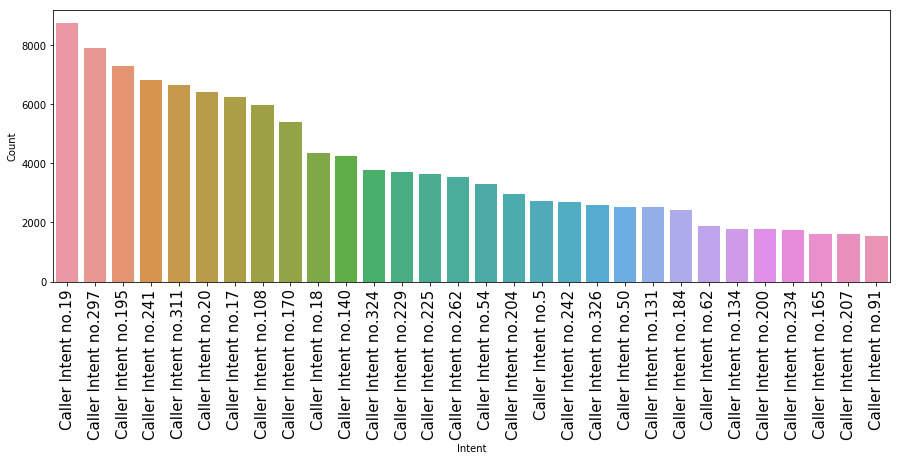

In [67]:
plot_data = pd.DataFrame(repeat_caller.intent.value_counts(normalize=False)[:30]).reset_index()
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(ax=ax, x="index", y="intent", data=plot_data)
plt.xticks(rotation=90, fontsize=15)
plt.xlabel('Intent')
plt.ylabel('Count')

### Top 30 Intents by "same_intent" Count

C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


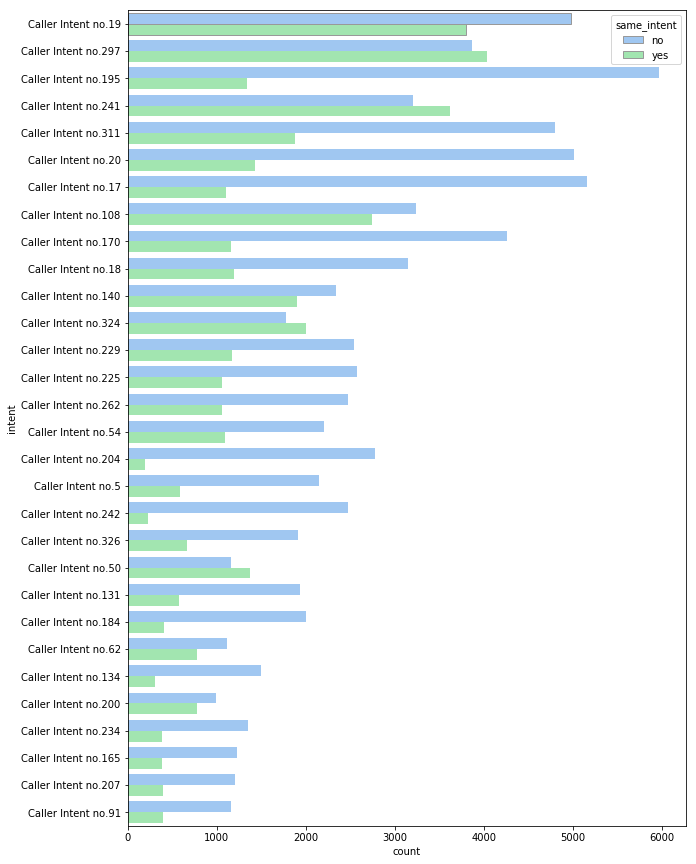

In [42]:
fig, ax = plt.subplots(figsize=(10,15))
sns.countplot(ax=ax, y="intent", hue="same_intent",
            palette="pastel", edgecolor=".6",
            data=repeat_caller,
            order=repeat_caller.intent.value_counts().iloc[:30].index)


In [43]:
yes_no = pd.get_dummies(repeat_caller['same_intent'])
repeat_caller_pivot = pd.pivot_table(pd.concat([repeat_caller, yes_no], axis=1),index=["intent"],values=['no','yes'],aggfunc=[np.sum])['sum'].reset_index()
repeat_caller_pivot_len = pd.pivot_table(pd.concat([repeat_caller, yes_no], axis=1),index=["intent"],values=['same_intent'],aggfunc=[len])['len'].reset_index()
repeat_caller_pivot_combined = pd.concat([repeat_caller_pivot, repeat_caller_pivot_len["same_intent"]], axis=1)
repeat_caller_pivot_combined.columns = ['intent','no','yes','total']
repeat_caller_pivot_combined['no'] = repeat_caller_pivot_combined['no']/repeat_caller_pivot_combined['total']*100
repeat_caller_pivot_combined['yes'] = repeat_caller_pivot_combined['yes']/repeat_caller_pivot_combined['total']*100
repeat_caller_pivot_combined.sort_values(by=['total'], inplace=True, ascending=False)
repeat_caller_pivot_combined.head(5)

,intent,no,yes,total
101,Caller Intent no.19,56.714204,43.285796,8765
220,Caller Intent no.297,48.968224,51.031776,7899
107,Caller Intent no.195,81.678762,18.321238,7303
159,Caller Intent no.241,46.964809,53.035191,6820
237,Caller Intent no.311,71.884840,28.115160,6669


### Top 30 Intents by "same_intent" Normalized

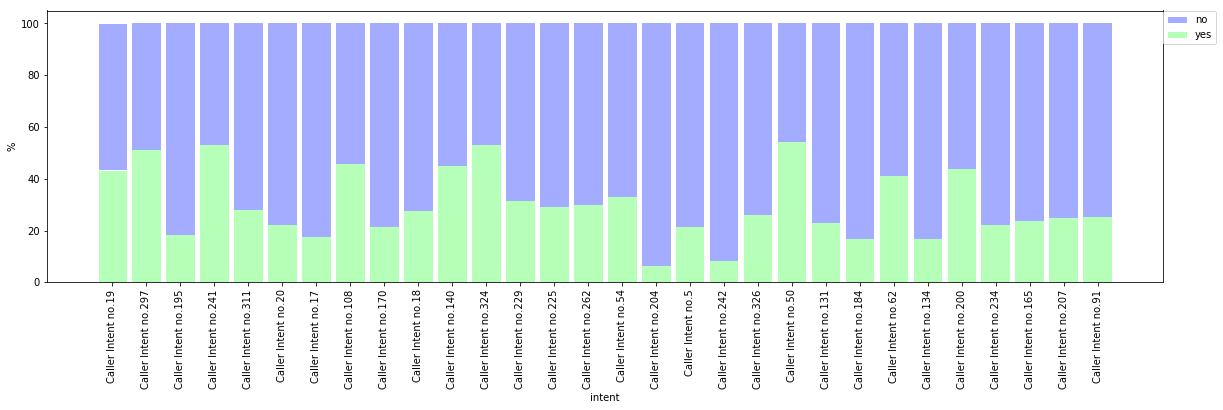

In [52]:
# plot
greenBars = repeat_caller_pivot_combined.yes[:30]
blueBars = repeat_caller_pivot_combined.no[:30]
r = list(range(30))
barWidth = 0.85
names = repeat_caller_pivot_combined['intent']
# Create green Bars
bar1= plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create blue Bars
bar2=plt.bar(r, blueBars, bottom=greenBars, color='#a3acff', edgecolor='white', width=barWidth)
 
# Customized
plt.xticks(rotation=90, fontsize=10)
plt.xticks(r, names)
plt.xlabel("intent")
plt.ylabel("%")
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.legend([bar2,bar1], ["no", "yes"], bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
# Show graphic
plt.show()


### Observations
Some of the intents show a relatively higher chance of repeating itself on the next call; there seem to be an indication that there exists a releationship between the two variables. I will conduct a Chi-squared test in the next section to validate such claim. 

## Chi-Squared Test

The Chi-square test of independence tests if there is a significant relationship between two categorical variables. The test is comparing the observed observations to the expected observations. Our hypotheses are the following:

- **The H0 (Null Hypothesis)**: There is no relationship between ___variable "intent"___ and ___variable "same intent"___ (i.e. yes/no whether caller is calling for the same intent).

- **The H1 (Alternative Hypothesis)**: There is a relationship between ___variable "intent"___ and ___variable "same intent"___.

If the p-value is significant, we can reject the null hypothesis and claim that the findings support the alternative hypothesis.

The following assumptions need to be meet in order for the results of the Chi-square test to be trusted.

- When testing the data, the cells should be frequencies or counts of cases and not percentages. It is okay to convert to percentages after testing the data
- The levels (categories) of the variables being tested are mutually exclusive
- Each participant contributes to only one cell within the Chi-square table
- The groups being tested must be independent
- The value of expected cells should be greater than 5

If all of these assumptions are met, then Chi-square is the correct test to use.

The chi2_contingency() method conducts the Chi-square test on a contingency table (crosstab). Having said that, we first need to assign our crosstab to a variable to pass it through the method.

In [53]:
import matplotlib.pyplot as plt
from scipy import stats

In [54]:
repeat_caller_ct = pd.crosstab(repeat_caller['intent'], repeat_caller['same_intent'])

In [55]:
# Some of the intents have very low volume, I will only consider intents that are at least 0.5% volume of the dataset 
chi_data = repeat_caller_ct[(repeat_caller_ct.yes + repeat_caller_ct.no) > 0.005*len(repeat_caller)]
print("%s out of %s intents has a volume higher than 0.5%%" %(len(repeat_caller_ct),len(chi_data)))

331 out of 44 intents has a volume higher than 0.5%


In [56]:
chi_data

same_intent,no,yes
intent,,
Caller Intent no.100,715,276
Caller Intent no.108,3238,2739
Caller Intent no.131,1938,580
Caller Intent no.134,1492,301
Caller Intent no.140,2340,1901
Caller Intent no.155,1171,139
Caller Intent no.16,894,397
Caller Intent no.165,1229,381
Caller Intent no.17,5154,1107


In [57]:
chi2, p, dof, ex = stats.chi2_contingency(chi_data)

In [58]:
print("Is the result statistically significant at the 0.05 level? Answer: %s." %(p < 0.05))

Is the result statistically significant at the 0.05 level? Answer: True.


In [59]:
print("p-value is %s" %(p))

p-value is 0.0


Note that the resulted p-value of 0.0 is caused by loss of precision.

## Post-hoc Test

When the chi-square test of a table larger than 2×2 is significant, it is desirable to investigate the data further.  Pairwise comparisons with Bonferroni corrections of the P values has shown to be working well for post-hoc tests for a test of independence.The formula is p/N, where “p”= the original tests p-value and “N”= the number of planned pairwise comparisons. 

However, since our original resulted in "0.0" due to loss of precision, I will simply consider any p-value of "0.0" in the pairwise comparison to be significant for simplicity. 

In [60]:
intent_considered = chi_data.index
post_hoc_df = repeat_caller[repeat_caller.intent.isin(intent_considered)]

In [61]:
dummies = pd.get_dummies(post_hoc_df['intent'])

In [62]:
dummies.head(5)

,Caller Intent no.100,Caller Intent no.108,Caller Intent no.131,Caller Intent no.134,Caller Intent no.140,Caller Intent no.155,Caller Intent no.16,Caller Intent no.165,Caller Intent no.17,Caller Intent no.170,...,Caller Intent no.326,Caller Intent no.40,Caller Intent no.5,Caller Intent no.50,Caller Intent no.52,Caller Intent no.54,Caller Intent no.62,Caller Intent no.67,Caller Intent no.88,Caller Intent no.91
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
intent_dict = { "intent": [],"p_value":[]}
for series in dummies:
    nl = "\n"
    
    crosstab = pd.crosstab(dummies[f"{series}"], repeat_caller['same_intent'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")
    intent_dict["intent"].append(series)
    intent_dict["p_value"].append(p)

intent_dict = pd.DataFrame(intent_dict)

same_intent              no    yes
Caller Intent no.100              
0                     92267  41821
1                       715    276 

Chi2 value= 4.956730252857227
p-value= 0.025989304883123104
Degrees of freedom= 1

same_intent              no    yes
Caller Intent no.108              
0                     89744  39358
1                      3238   2739 

Chi2 value= 625.8807604238976
p-value= 3.932989859838177e-138
Degrees of freedom= 1

same_intent              no    yes
Caller Intent no.131              
0                     91044  41517
1                      1938    580 

Chi2 value= 78.68132861710662
p-value= 7.29821095594964e-19
Degrees of freedom= 1

same_intent              no    yes
Caller Intent no.134              
0                     91490  41796
1                      1492    301 

Chi2 value= 174.4105054871344
p-value= 8.052640914607928e-40
Degrees of freedom= 1

same_intent              no    yes
Caller Intent no.140              
0                     90642

same_intent             no    yes
Caller Intent no.62              
0                    91870  41322
1                     1112    775 

Chi2 value= 87.06748737536546
p-value= 1.0488058135039356e-20
Degrees of freedom= 1

same_intent             no    yes
Caller Intent no.67              
0                    92405  41598
1                      577    499 

Chi2 value= 116.26641267834003
p-value= 4.155506467045484e-27
Degrees of freedom= 1

same_intent             no    yes
Caller Intent no.88              
0                    91871  41888
1                     1111    209 

Chi2 value= 145.33792350668503
p-value= 1.8116865367550198e-33
Degrees of freedom= 1

same_intent             no    yes
Caller Intent no.91              
0                    91817  41705
1                     1165    392 

Chi2 value= 26.04697785777409
p-value= 3.332100165318677e-07
Degrees of freedom= 1



In [64]:
intent_dict.sort_values(by=['p_value'])

,intent,p_value
29,Caller Intent no.297,0.000000e+00
23,Caller Intent no.241,0.000000e+00
17,Caller Intent no.204,1.011794e-190
33,Caller Intent no.324,4.658709e-190
24,Caller Intent no.242,1.031336e-146
37,Caller Intent no.50,3.986667e-142
12,Caller Intent no.19,1.709828e-141
1,Caller Intent no.108,3.932990e-138
13,Caller Intent no.195,5.524892e-131
8,Caller Intent no.17,7.002262e-123


Based on the resulted p-values, 2 of the 44 pairwise comparisons are significant. I can now say that there is a significant relationship between:
- "Caller Intent no.297" **vs** calling about the same intent in a second call within 2 weeks
- "Caller Intent no.241" **vs** calling about the same intent in a second call within 2 weeks

## Conclusion

Since all of the expected frequencies are greater than 5, the Chi-squared test results can be trusted. We can reject the null hypothesis as the p-value is less than 0.05. Thus, the results indicate that there is a relationship between previous intents and next intents. 

We can also conclude that a higher proportion of individuals with previous intents of "Caller Intent no.297" and "Caller Intent no.241" will call about the same intent in their next call within 2 weeks. 

So, where do we go from here?

Knowing that callers who previously called about "Caller Intent no.297" and "Caller Intent no.241" have a high chance calling back for the same intents, we may establish a second call resolution to handle these calls differently from the moment it hits the inbound switch. Examples of second call resolution strategy:

- Proactive prompting at the IVR to ask whether callers are calling for those intents
- Direct repeat callers to the correct resource and provide important customer call information to the agent
- Improve the IVR menu for those 2 caller intents as the existing menu may not have everything needed to resolve customer's issues.

Even with the best IVR design, there will will always be second-call situations. Thus, implementing a second call resolution strategy offers special treatment be given to the repeat caller and can potentially convert a hostile caller into a loyal devotee.





## Reference

Python for Data Science, LLC, _Chi-square_, accessed 8 September 2018, <https://pythonfordatascience.org/chi-square-python/>